<a href="https://colab.research.google.com/github/Krish242005/DJ-Tech/blob/main/ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

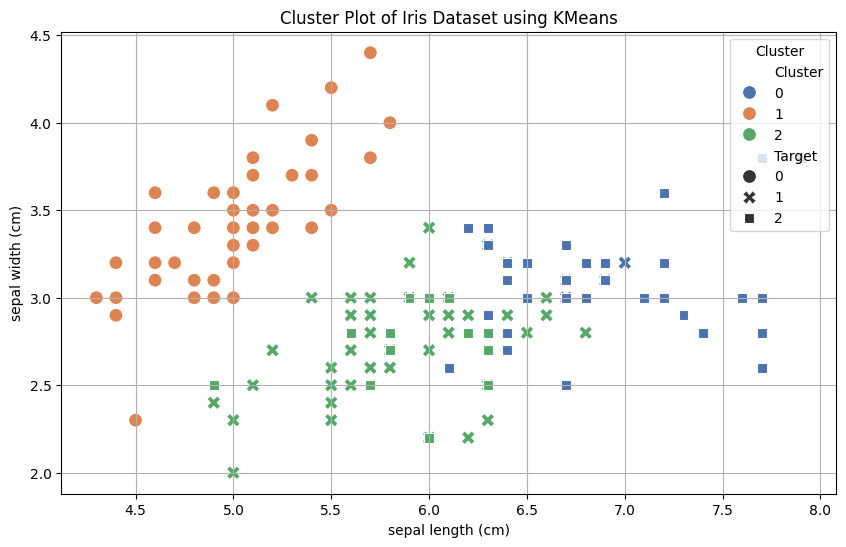

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
X['Cluster'] = clusters
X['Target'] = iris.target

# Plot clusters using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X,
    x=iris.feature_names[0],  # e.g., 'sepal length (cm)'
    y=iris.feature_names[1],  # e.g., 'sepal width (cm)'
    hue='Cluster',
    palette='deep',
    style='Target',
    s=100
)

plt.title('Cluster Plot of Iris Dataset using KMeans')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
import math
from collections import Counter

# 🌦️ Static weather dataset for training
dataset = [
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
]

# 🎯 Target attribute
target_attr = 'PlayTennis'

# 📌 Function to calculate entropy
def entropy(data, target):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(row[target] for row in data)
    return -sum((count / total) * math.log2(count / total) for count in counts.values())

# 📌 Function to compute information gain
def info_gain(data, attr, target):
    total_entropy = entropy(data, target)
    values = set(row[attr] for row in data)
    subset_entropy = 0
    for val in values:
        subset = [row for row in data if row[attr] == val]
        weight = len(subset) / len(data)
        subset_entropy += weight * entropy(subset, target)
    return total_entropy - subset_entropy

# 🌳 ID3 algorithm
def id3(data, attributes, target):
    labels = [row[target] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]  # All same class

    if not attributes:
        return Counter(labels).most_common(1)[0][0]  # Majority vote

    # Choose best attribute based on information gain
    best_attr = max(attributes, key=lambda attr: info_gain(data, attr, target))

    tree = {best_attr: {}}
    values = set(row[best_attr] for row in data)

    for val in values:
        subset = [row for row in data if row[best_attr] == val]
        if not subset:
            tree[best_attr][val] = Counter(labels).most_common(1)[0][0]
        else:
            new_attrs = [a for a in attributes if a != best_attr]
            tree[best_attr][val] = id3(subset, new_attrs, target)

    return tree

# 🧾 Attributes in the dataset (excluding the target)
attributes = list(dataset[0].keys())
attributes.remove(target_attr)

# 🌳 Build the decision tree
decision_tree = id3(dataset, attributes, target_attr)

# 📤 Print the tree
import pprint
print("Decision Tree:")
pprint.pprint(decision_tree)
import matplotlib.pyplot as plt

# Your decision tree (from the ID3 implementation)
decision_tree = {
    'Outlook': {
        'Sunny': {
            'Humidity': {
                'High': 'No',
                'Normal': 'Yes'
            }
        },
        'Overcast': 'Yes',
        'Rain': {
            'Wind': {
                'Weak': 'Yes',
                'Strong': 'No'
            }
        }
    }
}

# Function to plot tree in 2D with matplotlib
def plot_tree(tree, x=0.5, y=1, x_min=0, x_max=1, y_step=0.15, ax=None, parent=None, edge_label=''):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_axis_off()
        plot_tree(tree, x, y, x_min, x_max, y_step, ax)
        plt.show()
        return

    if isinstance(tree, dict):
        attribute = next(iter(tree))
        children = tree[attribute]
        # Plot this node
        ax.text(x, y, attribute, bbox=dict(boxstyle="round,pad=0.3", fc="skyblue", ec="b", lw=2),
                ha='center', va='center', fontsize=12)

        # Number of children
        n = len(children)
        # Width allocation for children
        width = (x_max - x_min)
        step = width / n
        start_x = x_min + step / 2

        # Draw edges and recursively plot children
        for i, (val, subtree) in enumerate(children.items()):
            child_x = start_x + i * step
            child_y = y - y_step

            # Draw edge line
            ax.plot([x, child_x], [y - 0.02, child_y + 0.02], 'k-')



Decision Tree:
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [ ]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

# --- Same ID3 Code from Before (dataset, entropy, info_gain, id3) ---

dataset = [
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
]

target_attr = 'PlayTennis'

def entropy(data, target):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(row[target] for row in data)
    return -sum((count / total) * math.log2(count / total) for count in counts.values())

def info_gain(data, attr, target):
    total_entropy = entropy(data, target)
    values = set(row[attr] for row in data)
    subset_entropy = 0
    for val in values:
        subset = [row for row in data if row[attr] == val]
        weight = len(subset) / len(data)
        subset_entropy += weight * entropy(subset, target)
    return total_entropy - subset_entropy

def id3(data, attributes, target):
    labels = [row[target] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]
    if not attributes:
        return Counter(labels).most_common(1)[0][0]
    best_attr = max(attributes, key=lambda attr: info_gain(data, attr, target))
    tree = {best_attr: {}}
    values = set(row[best_attr] for row in data)
    for val in values:
        subset = [row for row in data if row[best_attr] == val]
        if not subset:
            tree[best_attr][val] = Counter(labels).most_common(1)[0][0]
        else:
            new_attrs = [a for a in attributes if a != best_attr]
            tree[best_attr][val] = id3(subset, new_attrs, target)
    return tree

attributes = list(dataset[0].keys())
attributes.remove(target_attr)
decision_tree = id3(dataset, attributes, target_attr)

# --- Plotting Code Starts Here ---

# Convert tree into graph
def build_graph(tree, graph=None, parent=None, edge_label=''):
    if graph is None:
        graph = nx.DiGraph()
    if isinstance(tree, dict):
        root = next(iter(tree))
        node_id = f"{root}_{id(tree)}"
        graph.add_node(node_id, label=root)
        if parent:
            graph.add_edge(parent, node_id, label=edge_label)
        for val, subtree in tree[root].items():
            build_graph(subtree, graph, node_id, str(val))
    else:
        leaf_id = f"{tree}_{id(tree)}"
        graph.add_node(leaf_id, label=tree)
        if parent:
            graph.add_edge(parent, leaf_id, label=edge_label)
    return graph
def print_tree(tree, indent=''):
    if isinstance(tree, dict):
        for attribute, branches in tree.items():
            for value, subtree in branches.items():
                print(f"{indent}|-- {attribute} = {value}")
                print_tree(subtree, indent + "    ")
    else:
        print(f"{indent}--> {tree}")
print("ID3 Decision Tree (Console View):")
print_tree(decision_tree)


ID3 Decision Tree (Console View):
|-- Outlook = Sunny
    |-- Humidity = High
        --> No
    |-- Humidity = Normal
        --> Yes
|-- Outlook = Rain
    |-- Wind = Weak
        --> Yes
    |-- Wind = Strong
        --> No
|-- Outlook = Overcast
    --> Yes


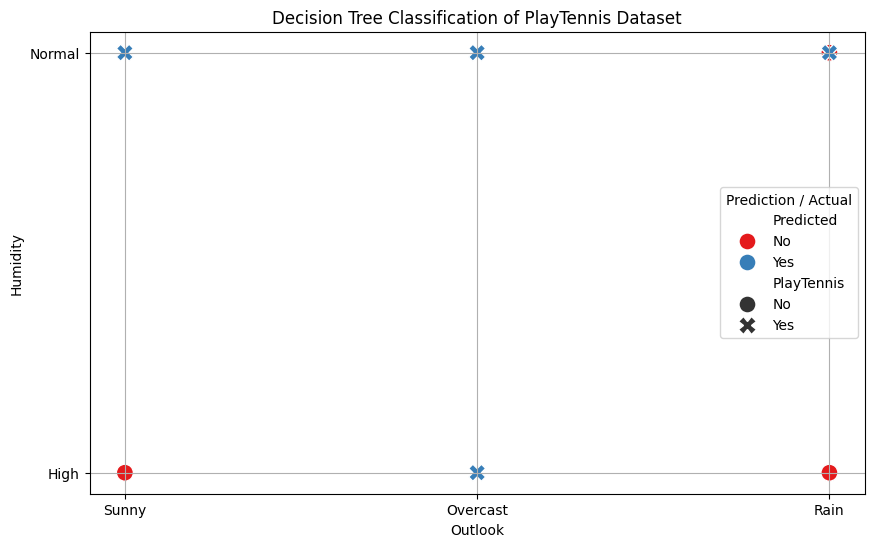

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math

# --- Dataset ---
data = [
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'No'},
    {'Outlook': 'Overcast', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Weak',   'PlayTennis': 'No'},
    {'Outlook': 'Sunny',    'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Sunny',    'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'Yes'},
    {'Outlook': 'Overcast', 'Temperature': 'Hot',  'Humidity': 'Normal', 'Wind': 'Weak',   'PlayTennis': 'Yes'},
    {'Outlook': 'Rain',     'Temperature': 'Mild', 'Humidity': 'High',   'Wind': 'Strong', 'PlayTennis': 'No'},
]

df = pd.DataFrame(data)

# --- Encode categorical values numerically for plotting ---
outlook_map = {'Sunny': 0, 'Overcast': 1, 'Rain': 2}
humidity_map = {'High': 0, 'Normal': 1}
label_map = {'No': 0, 'Yes': 1}

df['Outlook_num'] = df['Outlook'].map(outlook_map)
df['Humidity_num'] = df['Humidity'].map(humidity_map)
df['Label'] = df['PlayTennis'].map(label_map)

# --- ID3 Implementation ---
def entropy(data, target):
    total = len(data)
    counts = Counter(row[target] for row in data)
    return -sum((count / total) * math.log2(count / total) for count in counts.values())

def info_gain(data, attr, target):
    total_entropy = entropy(data, target)
    values = set(row[attr] for row in data)
    subset_entropy = 0
    for val in values:
        subset = [row for row in data if row[attr] == val]
        weight = len(subset) / len(data)
        subset_entropy += weight * entropy(subset, target)
    return total_entropy - subset_entropy

def id3(data, attributes, target):
    labels = [row[target] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]
    if not attributes:
        return Counter(labels).most_common(1)[0][0]
    best_attr = max(attributes, key=lambda attr: info_gain(data, attr, target))
    tree = {best_attr: {}}
    values = set(row[best_attr] for row in data)
    for val in values:
        subset = [row for row in data if row[best_attr] == val]
        if not subset:
            tree[best_attr][val] = Counter(labels).most_common(1)[0][0]
        else:
            new_attrs = [a for a in attributes if a != best_attr]
            tree[best_attr][val] = id3(subset, new_attrs, target)
    return tree

# --- Build decision tree ---
tree = id3(data, ['Outlook', 'Temperature', 'Humidity', 'Wind'], 'PlayTennis')

# --- Predict function ---
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    val = instance[attr]
    subtree = tree[attr].get(val, None)
    if subtree is None:
        return 'Unknown'
    return predict(subtree, instance)

# --- Predict for each row ---
df['Predicted'] = df.apply(lambda row: predict(tree, row), axis=1)
df['Predicted_num'] = df['Predicted'].map(label_map)

# --- Plot like Iris cluster plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Outlook_num',
    y='Humidity_num',
    hue='Predicted',
    style='PlayTennis',
    s=150,
    palette='Set1'
)

plt.xticks([0, 1, 2], ['Sunny', 'Overcast', 'Rain'])
plt.yticks([0, 1], ['High', 'Normal'])
plt.xlabel("Outlook")
plt.ylabel("Humidity")
plt.title("Decision Tree Classification of PlayTennis Dataset")
plt.grid(True)
plt.legend(title="Prediction / Actual")
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features to reduce accuracy
y = iris.target       # All 3 classes

# Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



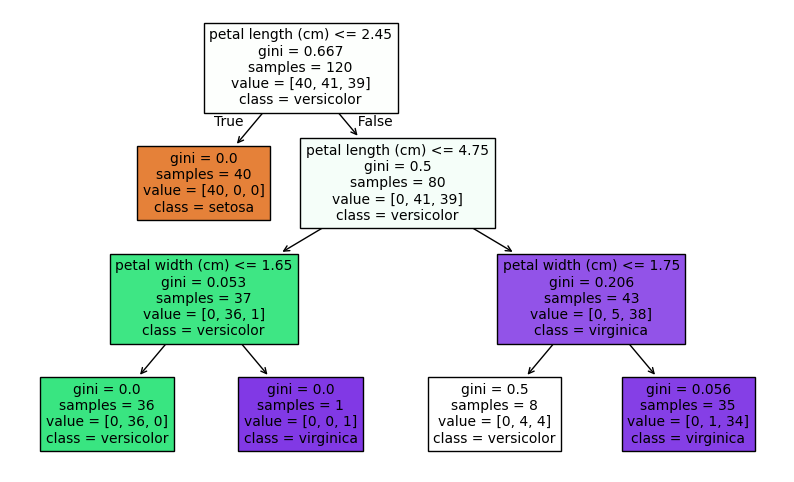

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()





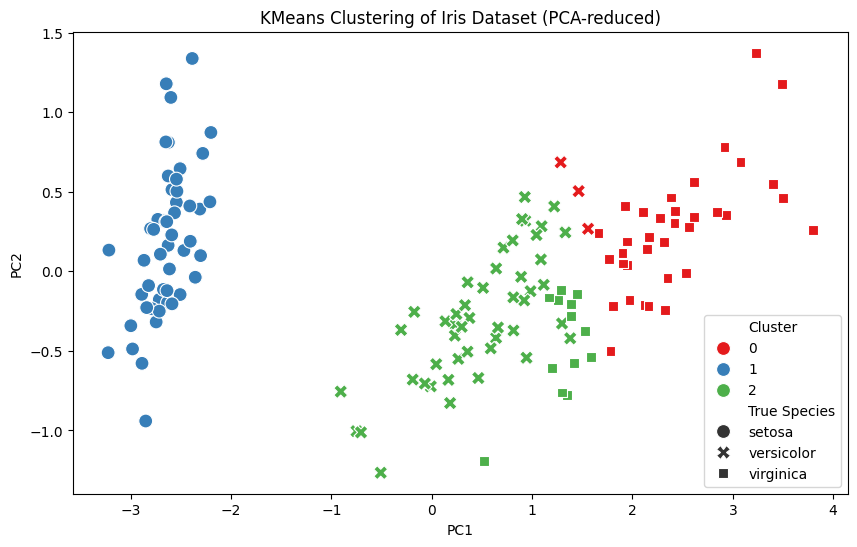

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Perform KMeans clustering (3 clusters for 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = clusters
df['True Species'] = pd.Categorical.from_codes(y, iris.target_names)

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', style='True Species', palette='Set1', s=100)
plt.title('KMeans Clustering of Iris Dataset (PCA-reduced)')
plt.show()


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


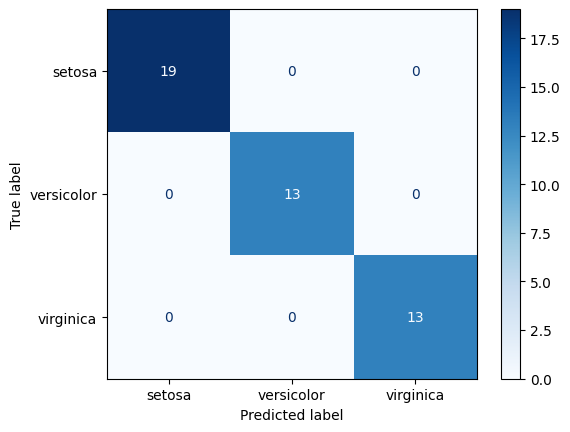

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train a classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
